In [1]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
games =  ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
          "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
          "InvertedDoublePendulum-v2"]

In [4]:
g = 'InvertedDoublePendulum-v2'
env = gym.make(g)

In [102]:
def get_reward(x, env, axis, clip):
    env.reset()
    a = np.zeros_like(env.action_space.low)
    a[axis] = x
    if clip == False and (not env.action_space.contains(a)):
        return -1
    return env.step(a)[1]

def get_reward_distribution(env, n_steps, clip=True):
    dims = len(env.action_space.low)
    trials = 100
    rewards = np.zeros((dims, 100, trials))
    assert np.std(env.action_space.low) == 0
    assert np.std(env.action_space.high) == 0
    for i in range(dims):
        x = np.linspace(env.action_space.low[i], env.action_space.high[i], 100)
        for j in range(trials):
            rewards[i, :, j] = np.vectorize(partial(get_reward, env=env, axis=i, clip=clip))(x)
    return x, np.mean(rewards, axis=-1)

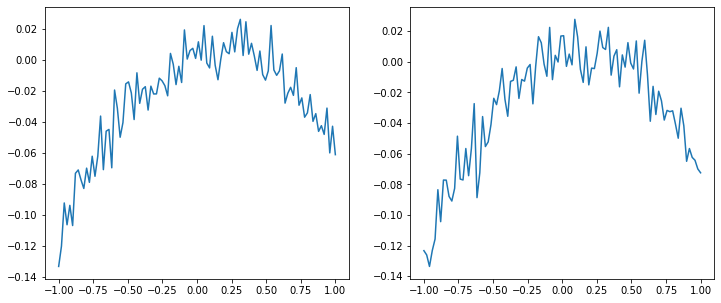

In [103]:

g = 'HalfCheetah-v2'
env = gym.make(g)
from gym.wrappers import ClipAction
env = ClipAction(env)

x, rewards = get_reward_distribution(env, n_steps=n_steps, clip=True)
#for d in range(len(env.action_space.low)):



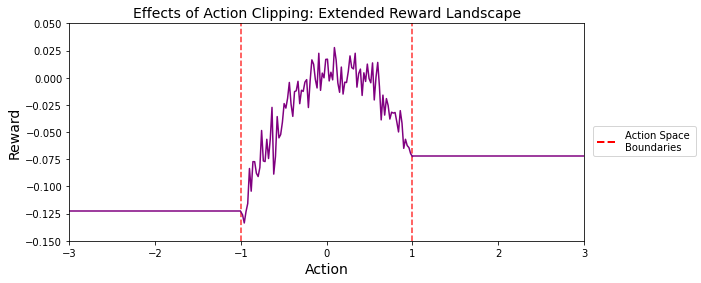

In [173]:
d = 2
fig, ax = plt.subplots(1, 1, figsize=(10,4), sharex=True, sharey=False)
sns.lineplot(x, rewards[d], label=f"{d}", ax=ax, legend=False, palette=['purple'], hue=1)
ax.set_xlim([-3, 3])
ax.hlines(-0.123, -5, -1, color='purple')
ax.hlines(-0.072, 1, 5, color='purple')
ax.set_ylabel('Reward', fontsize=14)
ax.set_xlabel('Action', fontsize=14)
ax.vlines(-1, -0.15,0.05, ls='dashed', alpha=0.8, color='red')
ax.vlines(1, -0.15,0.05, ls='dashed', alpha=0.8, color='red')
ax.set_ylim([-0.15, 0.05])
plt.title('Effects of Action Clipping: Extended Reward Landscape', fontsize=14)
from matplotlib.lines import Line2D
redline = Line2D([0], [0], color='red', ls='dashed', lw=2, label='Action Space \nBoundaries')
fig.legend(handles=[redline], loc='right')
fig.subplots_adjust(right=0.84)
plt.show()

KeyboardInterrupt: 

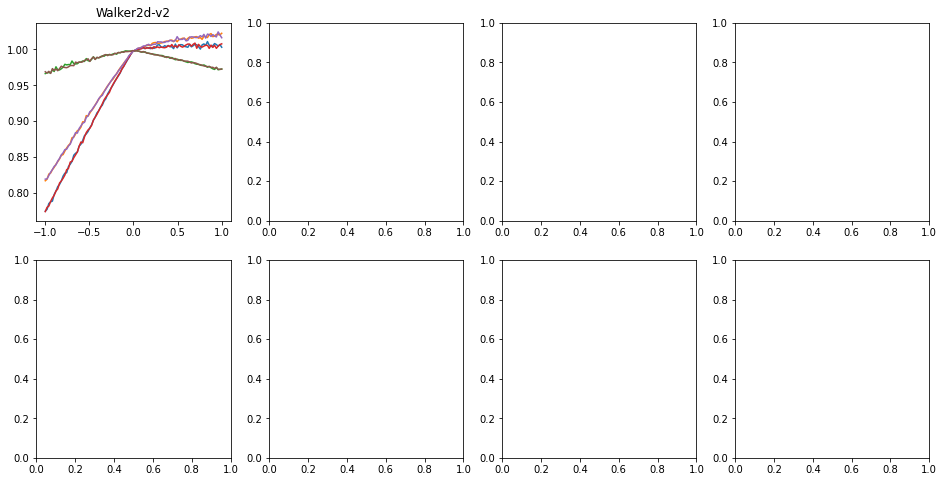

In [90]:
# Plot setup
n_steps = 0
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    env = gym.make(g)
    x, rewards = get_reward_distribution(env, n_steps=n_steps)
    for d in range(len(env.action_space.low)):
        sns.lineplot(x, rewards[d], label=f"{d}", ax=ax.flatten()[j], legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Reward')
for a in ax[-1]:
    a.set_xlabel('Action')
    
handles, labels = ax[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='?-th dimension in action space', ncol=9)
plt.show()

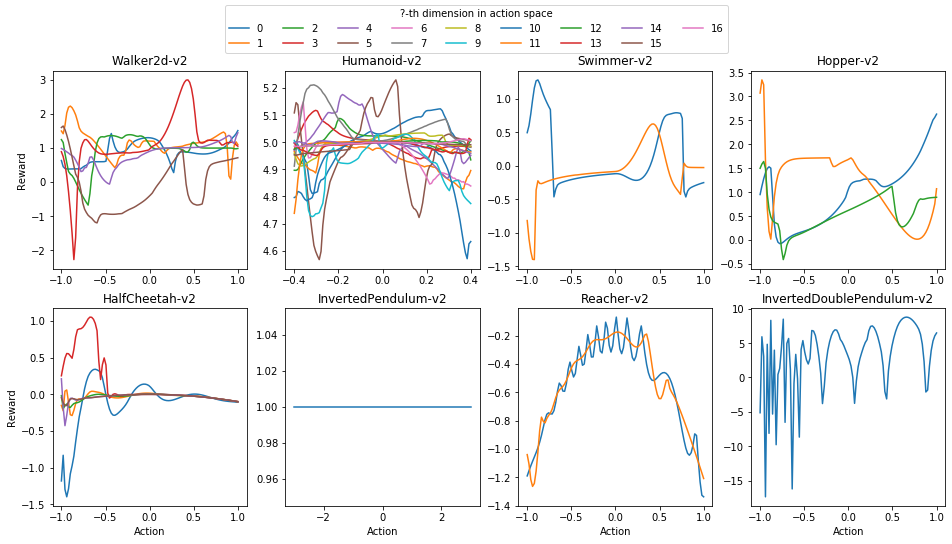

In [44]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    env = gym.make(g)
    x, rewards = get_reward_distribution(env, n_steps=n_steps)
    for d in range(len(env.action_space.low)):
        sns.lineplot(x, rewards[d], label=f"{d}", ax=ax.flatten()[j], legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Reward')
for a in ax[-1]:
    a.set_xlabel('Action')
    
handles, labels = ax[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='?-th dimension in action space', ncol=9)
plt.show()

In [8]:
action_dims = []
action_range = []
obs_dims = []
obs_range = []
for g in games:
    env = gym.make(g)
    action_dims.append(len(env.action_space.low))
    obs_dims.append(len(env.observation_space.low))
    
    assert np.std(env.action_space.low) == 0
    action_range.append(env.action_space.high[0] - env.action_space.low[0])
    assert np.isinf(env.observation_space.high).all() or np.std(env.observation_space.low) == 0
    obs_range.append(env.observation_space.high[0] - env.observation_space.low[0])

In [9]:
pd.DataFrame({'Environment': games, 'Action space dim': action_dims, 'Action space range (per dim)': action_range,
              'Observation space dim': obs_dims, 'Observation space range (per dim)': obs_range})

,Environment,Action space dim,Action space range (per dim),Observation space dim,Observation space range (per dim)
0,Walker2d-v2,6,2.0,17,inf
1,Humanoid-v2,17,0.8,376,inf
2,Swimmer-v2,2,2.0,8,inf
3,Hopper-v2,3,2.0,11,inf
4,HalfCheetah-v2,6,2.0,17,inf
5,InvertedPendulum-v2,1,6.0,4,inf
6,Reacher-v2,2,2.0,11,inf
7,InvertedDoublePendulum-v2,1,2.0,11,inf


In [14]:
print(pd.DataFrame({'Environment': games, 'Action space dim': action_dims, 'Action space range (per dim)': action_range,
              'Observation space dim': obs_dims}).set_index('Environment').to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Action space dim &  Action space range (per dim) &  Observation space dim \\
Environment               &                   &                               &                        \\
\midrule
Walker2d-v2               &                 6 &                           2.0 &                     17 \\
Humanoid-v2               &                17 &                           0.8 &                    376 \\
Swimmer-v2                &                 2 &                           2.0 &                      8 \\
Hopper-v2                 &                 3 &                           2.0 &                     11 \\
HalfCheetah-v2            &                 6 &                           2.0 &                     17 \\
InvertedPendulum-v2       &                 1 &                           6.0 &                      4 \\
Reacher-v2                &                 2 &                           2.0 &                     11 \\
InvertedDoublePendulum-v2 &  